<a href="https://colab.research.google.com/github/kAi3345/Dark-Matter/blob/main/GravitationalWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install gwpy                                                 #install gwpy package so we can analyze gravitational wave

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ligo-segments: filename=ligo_segments-1.4.0-cp310-cp310-linux_x86_64.whl size=99251 sha256=f2ccbda87d98e04a0215760747cc29cda3038bc6264b9aaf2ccb2015b0e13012
  Stored in directory: /root/.cache/pip/wheels/6d/48/d1/3466977be4e41ba57f92ad0d5619f083df43cf319a151c4e06
Successfully built ligo-segments


The following example is from: https://gwpy.github.io/docs/stable/examples/signal/gw150914/

In [3]:
# # -- Set a GPS time:
t0 = 1126259462.4    # -- GW150914      first record gravitational event
# t0 = 1187008882.4    # -- GW170817    first record neutron star merger

from gwpy.timeseries import TimeSeries
hdata = TimeSeries.fetch_open_data('H1', t0 - 32, t0 + 32)                   #create times series of a 32 day window around the day of gravitational event

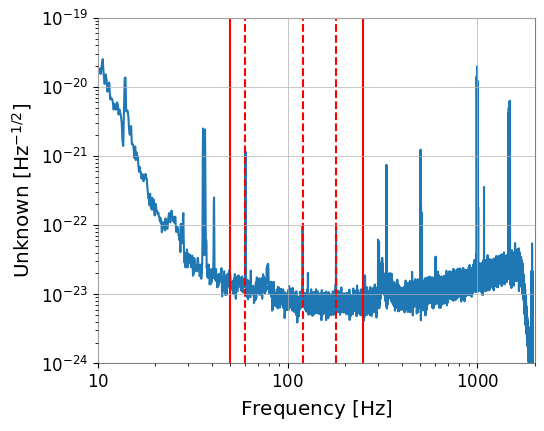

In [4]:
import matplotlib.pyplot as plt

# -- Plot ASD
fig2 = hdata.asd(fftlength=8).plot()                           # doing a frequency analysis and ouput the frequency and power of each frequency
plt.xlim(10,2000)                                              # set x axis from 10 to 2000
ymin = 1e-24                                                   # set minimum value in y-axis to 10^-24
ymax = 1e-19                                                   # set maximun value in y-axis to 10^-19
plt.ylim(ymin, ymax)
plt.vlines(60, ymin, ymax, linestyle="dashed", color="red")    #overlap 60Hz frequency to mark it's unwanted
plt.vlines(120, ymin, ymax, linestyle="dashed", color="red")   #overlap 120Hz frequency to mark it's unwanted
plt.vlines(180, ymin, ymax, linestyle="dashed", color="red")   #overlap 180Hz frequency to mark it's unwanted
plt.vlines(50, ymin, ymax, linestyle="solid", color="red")     #show the left boundary of frequency window
plt.vlines(250, ymin, ymax, linestyle="solid", color="red")    #show the left boundary of frequency window

In [5]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, hdata.sample_rate)            # create a frequency window of 50-250Hz so that we can search gravitational wave signal

notches = [filter_design.notch(line, hdata.sample_rate) for        # build a filter for unwanted 60, 120, 180 Hz frequency
           line in (60, 120, 180)]

zpk = filter_design.concatenate_zpks(bp, *notches)                 # concatenate each of filters together to create a single ZPK

hfilt = hdata.filter(zpk, filtfilt=True)                           # get data after the filter


In [6]:
hdata = hdata.crop(*hdata.span.contract(1))                        # original data from hanford
hfilt = hfilt.crop(*hfilt.span.contract(1))                        # data after croping out all the unwanted frequency

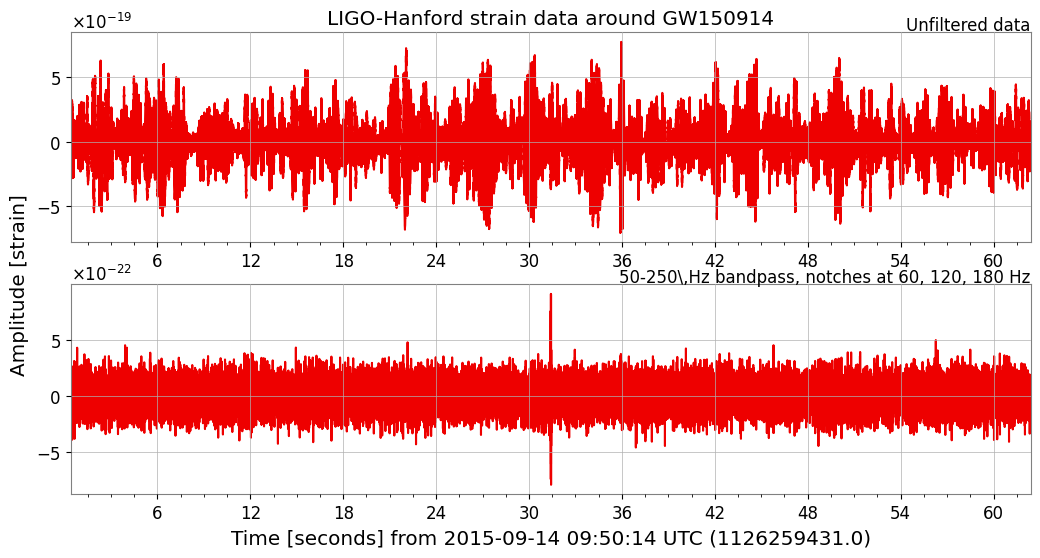

In [7]:
from gwpy.plot import Plot
plot = Plot(hdata, hfilt, figsize=[12, 6], separate=True, sharex=True,
            color='gwpy:ligo-hanford')
ax1, ax2 = plot.axes
ax1.set_title('LIGO-Hanford strain data around GW150914')                       # title for the graph
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')     # notice that the data in the graph is unfiltered
ax1.set_ylabel('Amplitude [strain]', y=-0.2)                                    # lable for y axis
ax2.set_ylabel('')
ax2.text(1.0, 1.01, r'50-250\,Hz bandpass, notches at 60, 120, 180 Hz',         # signal the data in the graph has been filtered
         transform=ax2.transAxes, ha='right')
plot.show()

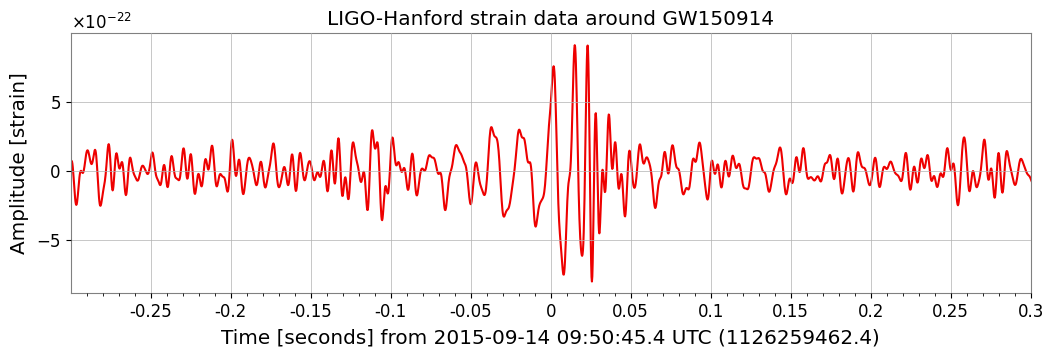

In [8]:
import matplotlib.pyplot as plt

plot = hfilt.plot(color='gwpy:ligo-hanford')
ax = plot.gca()
ax.set_title('LIGO-Hanford strain data around GW150914')                        # title of the graph
ax.set_ylabel('Amplitude [strain]')                                             # meaning of y axis
ax.set_xlim(t0 - 0.3, t0 + 0.3)                                                 # set the limit of x axis
ax.set_xscale('seconds', epoch=t0)                                              # the unit of x axis is in seconds
plot.show()

x_val = plt.gca().lines[0].get_xdata()                                          # x-value array of the plot
y_val = plt.gca().lines[0].get_ydata()                                          # y-value array of the plot


In [9]:
ldata = TimeSeries.fetch_open_data('L1', 1126259446, 1126259478)                # access data from Livingston Ligo
lfilt = ldata.filter(zpk, filtfilt=True)                                        # filter the unwanted frequency

In [10]:
lfilt.shift('6.9ms')                                                            # adjust the time that gravitational wave traveled to Livingston
lfilt *= -1                                                                     # change the phase since two detectors have different configuration

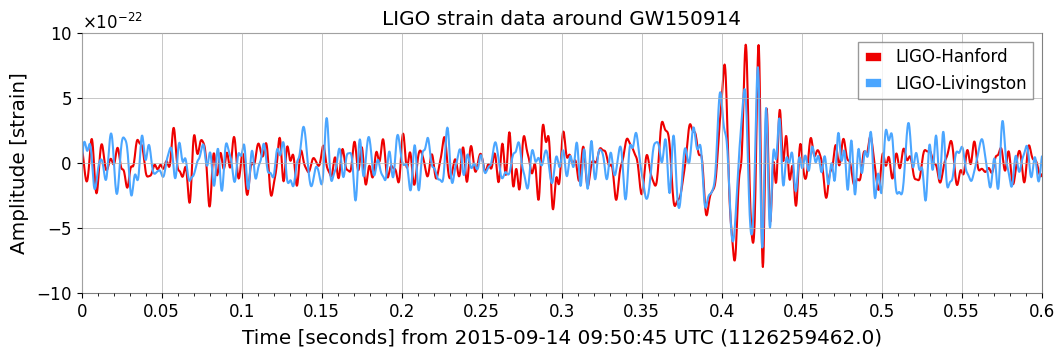

In [11]:
#comparison of gravitational
plot = Plot(figsize=[12, 4])                                                    # set size of the graph
ax = plot.gca()
ax.plot(hfilt, label='LIGO-Hanford', color='gwpy:ligo-hanford')                 # set the color of Hanford data curve and label the curve
ax.plot(lfilt, label='LIGO-Livingston', color='gwpy:ligo-livingston')           # set the color of Livingston data curve and label the curve
ax.set_title('LIGO strain data around GW150914')                                # set the title of the graph
ax.set_xlim(1126259462, 1126259462.6)
ax.set_xscale('seconds', epoch=1126259462)
ax.set_ylabel('Amplitude [strain]')                                             # label of y axis
ax.set_ylim(-1e-21, 1e-21)
ax.legend()
plot.show()

https://colab.research.google.com/github/losc-tutorial/quickview/blob/master/index.ipynb
Also from: https://gwpy.github.io/docs/stable/examples/signal/qscan/

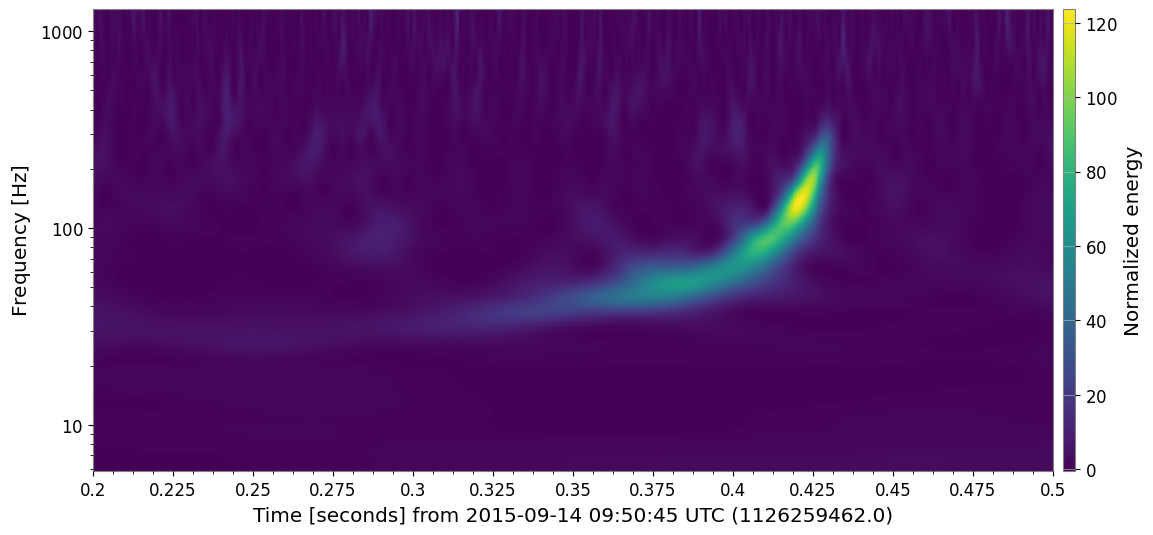

In [12]:
dt = 0.2  #-- Set width of q-transform plot, in seconds
hq = hfilt.q_transform(outseg=(t0-dt, t0+0.1))
fig4 = hq.plot()                               # show the chirp of the gravitational wave
ax = fig4.gca()
fig4.colorbar(label="Normalized energy")
ax.grid(False)
ax.set_yscale('log')

In [13]:
from scipy.io.wavfile import write
import numpy as np

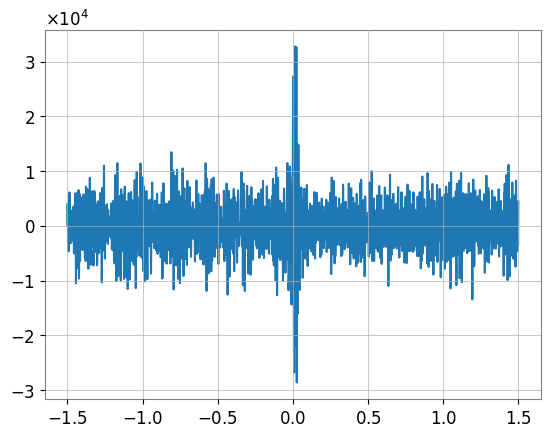

In [14]:
amplitude = np.iinfo(np.int16).max                                              # the amplitude of the sound

ind = np.where((x_val < (t0+1.5)) & (x_val > (t0-1.5)))                         # select the value between t0 +- 1.5 secs from x-value array of Hanford data
y = y_val[ind]
# y = y**3
y = y / np.max(y)
plt.plot(x_val[ind] - t0, (np.array(y) * amplitude).astype(np.int16))

In [15]:
fs = int(1 / np.median(np.diff(np.array(x_val[ind] - t0))))                     # sampling rate
print("fs = ", fs)
write("example.wav", fs, (np.array(y) * amplitude).astype(np.int16))            # output the example wave

fs =  4096


In [16]:
from google.colab import files
files.download("example.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Make C

(0.0, 0.1)

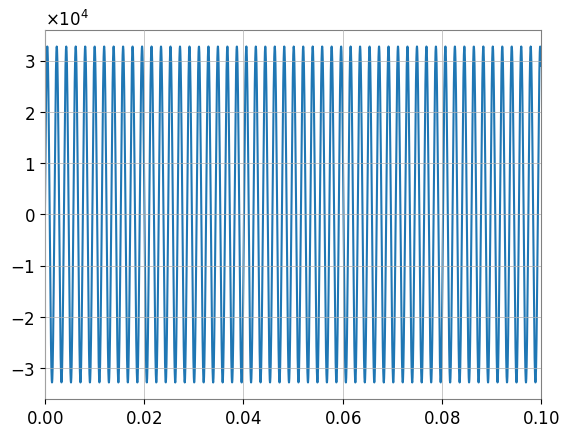

In [17]:
samplerate = 44100; fs = 261.63 * 2.0                   # frequency of C key
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max                      # the amplitude of the sound
data = amplitude * np.sin(2. * np.pi * fs * t)          # the wave of the sound
plt.plot(t, data)
plt.xlim(0, 0.1)

In [18]:
write("C.wav", samplerate, data.astype(np.int16))
files.download("C.wav")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>